In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import irtemp
import edge_detection as ed
import pixel_analysis as pa

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

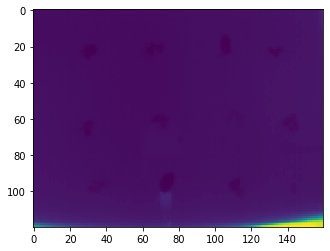

In [9]:
frames = ed.input_file('../musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')
plt.imshow(frames[0])

#### Use the function 'edge_detection.input_file' to load the input file

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

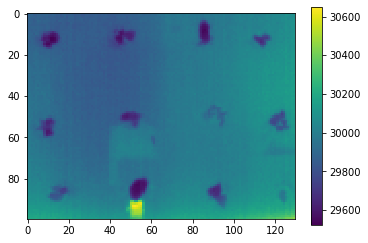

In [14]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[10:110,20:150])
plt.imshow(crop_frame[0])
plt.colorbar()

#### Use the wrapping function edge_detection.inflection_temp 

In [ ]:
# Using the wrapping function
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frame, 3, 3)

In [ ]:
sorted_regprops[0]

# sample temperature by multiple pixel calculation

In [15]:
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import remove_small_objects
from skimage import feature
from skimage.draw import circle

In [16]:
for size in range(15, 9, -1):
    for thres in range(1500, 900, -100):
        edges = feature.canny(crop_frame[0]/thres)
        filled_samples = binary_fill_holes(edges)
        cl_samples = remove_small_objects(filled_samples, min_size=size)
        labeled_samples = label(cl_samples)
        props = regionprops(labeled_samples, intensity_image=crop_frame[0])

In [17]:
props = regionprops(labeled_samples, intensity_image=crop_frame[0])
# Initializing arrays for all sample properties obtained from regprops.
row = np.zeros(len(props)).astype(int)
column = np.zeros(len(props)).astype(int)
area = np.zeros(len(props))
radius = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props), dtype=np.float64)
plate = np.zeros(len(props), dtype=np.float64)
plate_coord = np.zeros(len(props))

c = 0
for prop in props:
    row[c] = int(prop.centroid[0])
    column[c] = int(prop.centroid[1])
            # print(y[c])
    area[c] = prop.area
    perim[c] = prop.perimeter
    radius[c] = prop.equivalent_diameter/2
    rr, cc = circle(row[c], column[c], radius = radius[c]/3)
    intensity[c] = np.mean(crop_frame[0][rr,cc])
    plate[c] = crop_frame[0][row[c]][column[c]+int(radius[c])+3]
    plate_coord[c] = column[c]+radius[c]+3
    
    c = c + 1

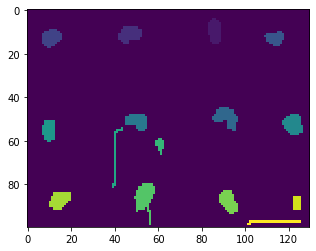

In [18]:
plt.imshow(labeled_samples)

In [19]:
a=[]
for row in range(len(labeled_samples)):
    x=labeled_samples[row].tolist()
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    number=np.sum(crop_frame[0][row][get_indexes(1,x)])
    a.append(number)
final_sum=np.sum(a)
result = final_sum/area[0]

In [20]:
for dot in range(len(column)):
    a[dot+1]=[]
    for row in range(len(labeled_samples)):
        x=labeled_samples[row].tolist()
        get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
        number=np.sum(crop_frame[0][row][get_indexes(dot+1,x)])
        a[dot+1].append(number)
    final_sum=np.sum(a[dot+1])
    result = final_sum/area[dot]
    print("sample", dot+1, result )

sample 1 29675.383333333335
sample 2 29678.833333333332
sample 3 29642.816666666666
sample 4 29810.697674418603
sample 5 29935.884615384617
sample 6 29732.7
sample 7 29887.68918918919
sample 8 29723.153846153848
sample 9 29959.40625
sample 10 29938.333333333332
sample 11 29768.1875
sample 12 29803.575757575756
sample 13 29863.3064516129
sample 14 30030.166666666668
sample 15 30235.653846153848


#### Plotting the locations at which the temperature was recorded

In [ ]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')#the origin location of the samples
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [ ]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

In [ ]:
m_df = pa.pixel_temp(crop_frame,len(crop_frame),n_columns = 3, n_rows = 3)